# 12. Training Artificial Neural Networks for Image Recognition

이 장에서 할 것들

* 멀티레이어 뉴럴 네트워크 이해
* 이미지 분류를 위한 뉴럴 네트워크 훈련
* backpropagation 알고리즘 시행
* 뉴럴네트워크 디버깅

# Modeling complex functions with artificial neural networks

**backpropagation**의 발명 이후 뉴럴 네트워크를 효율적으로 훈련시킬 수 있게 되었고, 이 이후로 큰 인기를 끌게 되었다. 그 이후 우리가 부르는 딥러닝 알고리즘에 관한 발전이 있었고, **feature detectors**(unlabeled 데이터로부터 딥 뉴럴 네트워크를 미리 훈련 시키는) 를 만들 수 있게 되었다. 

## Single-layer neural network recap

ch2에 나왔던 ADAptive LInear NEuron (Adaline) algorithm을 먼저 recap해도록 해보자.

<img src="ch12_1.png" alt="Drawing" style="width: 700px;"/>

## Introducing the multi-layer neural network architecture

하나의 뉴런을 multi layer feedforward neural network(MLP)로 구성하는 법을 배울 것이다. MLP에서 층의 갯수가 unit의 갯수는 하나의 hyperparameter로써 우리가 설정해야 할 값이다. 하지만, 층의 갯수가 늘어날 때 backpropagation을 통해 계싼하면, error gradient의 값이 점점 작아지게 된다. 이런 `vanishing gradient` 문제는 모델의 학습을 어렵게 한다. 따라서 deep neural net을 미리 훈련시키는 특별한 알고리즘이 발전되었고, 이는 deep learning 이라고 불린다. 

<img src="ch12_2.png" alt="Drawing" style="width: 600px;"/>

위와 같이 lth layer의 ith activation unit을 a_i ^(l)이라고 표현하고, a_0^(1)과 같은 경우는 **bias units**라고 부르며 값은 1이다. 인풋 레이어의 activation은 밑의 그림과 같다.

<img src="ch12_3.png" alt="Drawing" style="width: 300px;"/>

각 unit layer l 은 l+1번째 레이어와 weight coefficient로 연결되어 있다. 아웃풋 레이어의 한 유닛이 바이너리 분류 테스크에는 적합할 수 있지만, 위 그림과 같은 일반적인 형태의 뉴럴넷은 One-vs-All의 일반화를 통해 멀티 클래스 분류를 수행할 수 있게 해준다. 챕터 4의 one hot encoding을 이용하면 훈련 데이터의 각 클래스 라벨들을 분류할 수 있다.

<img src="ch12_4.png" alt="Drawing" style="width: 700px;"/>

## Activating a neural network via forward propagation

1. 인풋 레이어에서 시작해, 패턴을 앞으로 부터(output layer쪽으로) 전파시킨다.
2. 아웃풋에 기반해, 에러값을 구한다.(cost function을 최소화하기 위해)
3. 에러값을 역전파해, 네트워크 안의 각각의 weight들에 대해 미분값을 구한 후 모델을 업데이트 한다.

이러한 단계를 여러번 시행해 weight를 학습시킨 후, 네트워크의 아웃풋을 계산하기 위해 forward propagation하고 threshold function을 써 클래스 라벨(one-hot encoding 된)을 예측한다. 

이제 forward propagation의 단계를 보자. 각각의 hidden unit은 인풋 레이어의 모든 유닛과 연결되어 있으므로, 먼저 activation a_1^(2)를 계산한다.

<img src="ch12_5.png" alt="Drawing" style="width: 400px;"/>

여기서, z_1^(2)는 net input이다. 여기서 activation function은 미분 가능해야 한다. weights를 학습시켜야 하기 때문이며, weights는 뉴런을 gradient-based 방법으로 연결시킨다. 이미지 분류와 같은 문제를 풀기 위해서는 activation function으로 sigmoid(logistic) 함수와 같은 것이 필요하다.

<img src="ch12_6.png" alt="Drawing" style="width: 400px;"/>

MLP는 feedforward 인공신경망의 전형적인 예시이다. feedforward는 각 레이어가 loop 없이 다음 레이어에 대한 인풋으로 기능하는 것을 의미한다. 이는 recurrent neural network와는 대조된다(다음에 다룬다). 앞으로는 activation을 vectorize해서 표현하겠다.

<img src="ch12_7.png" alt="Drawing" style="width: 200px;"/>

여기서 a^(1)은 샘플에 bias unit을 합친 [m+1]*1 차원 feature vector이다. W^(1)은 h*[m+1] 차원의 weight matrix이며, h는 히든 유닛의 갯수를 말한다. 이를 계산하면, h*1차원의 net input vector z^(2)가 나오고 이로 activation a^(2)를 계산한다. 우리는 이를 모든 n 샘플로 일반화 시킬수 있다. 

<img src="ch12_8.png" alt="Drawing" style="width: 300px;"/>

여기서 A^(1)은 n*[m+1] 행렬이며, h*n차원의 net input matrix Z^(2)를 계산하게 된다. 마지막으로 activation function을 net input matrix의 각 값에 적용해 다음 레이어를 위한 h*n activation matrix A^(2)를 계산하게 된다.

<img src="ch12_9.png" alt="Drawing" style="width: 250px;"/>

비슷하게, output layer의 activation을 다음과 같이 다시 쓸 수 있다.

<img src="ch12_10.png" alt="Drawing" style="width: 300px;"/>

여기서 우리는 t*h 행렬 W^(2) (t는 아웃풋 유닛의 갯수) 를 h*n차원 행렬 A^(2)에 곱해주었고 이믄 t*n 차원 행렬 Z^(3)을 계산하게 된다. 마지막으로, sigmoid 함수를 이용해 continuous valued output을 만든다.

<img src="ch12_11.png" alt="Drawing" style="width: 500px;"/>

## Classifying handwritten digits

In [4]:
import os
import struct
import numpy as np

def load_mnist(path, kind='train'):

    """Load MNIST data from `path`"""

    labels_path = os.path.join('/Users/WooJin/Documents/ML_study/MNIST_data',
                               '%s-labels-idx1-ubyte'
                               % kind)

    images_path = os.path.join('/Users/WooJin/Documents/ML_study/MNIST_data',
                                '%s-images-idx3-ubyte'
                                % kind)

    with open(labels_path, 'rb') as lbpath:
        magic, n = struct.unpack('>II', lbpath.read(8))
        labels = np.fromfile(lbpath, dtype=np.uint8)

    with open(images_path, 'rb') as imgpath:
        magic, num, rows, cols = struct.unpack(">IIII", imgpath.read(16))
        images = np.fromfile(imgpath, dtype=np.uint8).reshape(len(labels), 784)

    return images, labels

images는 n*m 차원 Numpy array이다. n은 샘플 수, m은 feature의 수이다. 트레이닝 셋은 약 6만개의 데이터를 가지고 있다. 이는 각각 28*28픽셀이다. label은 클래스 라벨(0-9)이다.여기서

`magic, n = struct.unpack('>II', lbpath.read(8))
   labels = np.fromfile(lbpath, dtype=np.uint8)`


<img src="ch12_17.png" alt="Drawing" style="width: 500px;"/>

위 코드로 magic number를 읽어오는데 이는 파일 프로토콜의 설명(?)이고, n은 file buffer에서의 number of items이며, 이는 fromfile 메소드로 바이트드를 numpy array로 읽어오기 전에 해야 할 과정이다. fmt 파라메터 값이 > II 인 것은 두가지 파트를 가진다.

* '>' : big-endian (바이트가 어떠한 순서로 저장되었는지 정의)
* I : unsigned integer(값의 범위: 0 ~ 4,294,967,295)



In [5]:
X_train, y_train = load_mnist('mnist', kind='train')
print('Rows: %d, columns: %d'
        % (X_train.shape[0], X_train.shape[1]))

X_test, y_test = load_mnist('mnist', kind='t10k')
print('Rows: %d, columns: %d'
      % (X_test.shape[0], X_test.shape[1]))

Rows: 60000, columns: 784
Rows: 10000, columns: 784


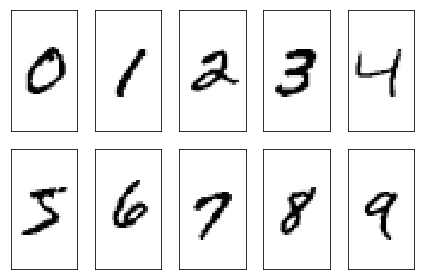

In [6]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(nrows=2, ncols=5, sharex=True, sharey=True,)
ax = ax.flatten()

for i in range(10):
    img = X_train[y_train == i][0].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

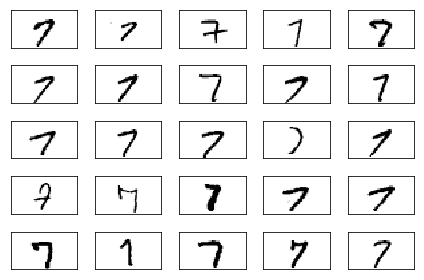

In [7]:
fig, ax = plt.subplots(nrows=5,
                       ncols=5,
                        sharex=True,
                        sharey=True,)
ax = ax.flatten()

for i in range(25):
    img = X_train[y_train == 7][i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()

## Implementing a multi-layer perceptron

여기서 하나의 인풋, 히든, 아웃풋 레이어를 사용해 MNIST를 분류해 볼 것이다. 

In [11]:
import numpy as np
from scipy.special import expit
import sys

class NeuralNetMLP(object):

    def __init__(self, n_output, n_features, n_hidden=30,
                    l1=0.0, l2=0.0, epochs=500, eta=0.001,
                     alpha=0.0, decrease_const=0.0, shuffle=True,
                    minibatches=1, random_state=None):
        np.random.seed(random_state)
        self.n_output = n_output
        self.n_features = n_features
        self.n_hidden = n_hidden
        self.w1, self.w2 = self._initialize_weights()
        self.l1 = l1
        self.l2 = l2
        self.epochs = epochs
        self.eta = eta
        self.alpha = alpha
        self.decrease_const = decrease_const
        self.shuffle = shuffle
        self.minibatches = minibatches

    def _encode_labels(self, y, k):
        onehot = np.zeros((k, y.shape[0]))
        for idx, val in enumerate(y):
            onehot[val, idx] = 1.0
        return onehot

    def _initialize_weights(self):
        w1 = np.random.uniform(-1.0, 1.0, size=self.n_hidden*(self.n_features + 1))
        w1 = w1.reshape(self.n_hidden, self.n_features + 1)
        w2 = np.random.uniform(-1.0, 1.0, size=self.n_output*(self.n_hidden + 1))
        w2 = w2.reshape(self.n_output, self.n_hidden + 1)
        return w1, w2

    def _sigmoid(self, z):
    # expit is equivalent to 1.0/(1.0 + np.exp(-z))
        return expit(z)

    def _sigmoid_gradient(self, z):
        sg = self._sigmoid(z)
        return sg * (1 - sg)

    def _add_bias_unit(self, X, how='column'):
        if how == 'column':
            X_new = np.ones((X.shape[0], X.shape[1]+1))
            X_new[:, 1:] = X
        elif how == 'row':    
            X_new = np.ones((X.shape[0]+1, X.shape[1]))
            X_new[1:, :] = X
        else:
            raise AttributeError('`how` must be `column` or `row`')
        return X_new

    def _feedforward(self, X, w1, w2):
        a1 = self._add_bias_unit(X, how='column')
        z2 = w1.dot(a1.T)
        a2 = self._sigmoid(z2)
        a2 = self._add_bias_unit(a2, how='row')
        z3 = w2.dot(a2)
        a3 = self._sigmoid(z3)
        return a1, z2, a2, z3, a3

    def _L2_reg(self, lambda_, w1, w2):
        return (lambda_/2.0) * (np.sum(w1[:, 1:] ** 2)\
                                + np.sum(w2[:, 1:] ** 2))

    def _L1_reg(self, lambda_, w1, w2):
        return (lambda_/2.0) * (np.abs(w1[:, 1:]).sum()\
                                + np.abs(w2[:, 1:]).sum())

    def _get_cost(self, y_enc, output, w1, w2):
        term1 = -y_enc * (np.log(output))
        term2 = (1 - y_enc) * np.log(1 - output)
        cost = np.sum(term1 - term2)
        L1_term = self._L1_reg(self.l1, w1, w2)
        L2_term = self._L2_reg(self.l2, w1, w2)
        cost = cost + L1_term + L2_term
        return cost

    def _get_gradient(self, a1, a2, a3, z2, y_enc, w1, w2):
        # backpropagation
        sigma3 = a3 - y_enc
        z2 = self._add_bias_unit(z2, how='row')
        sigma2 = w2.T.dot(sigma3) * self._sigmoid_gradient(z2)
        sigma2 = sigma2[1:, :]
        grad1 = sigma2.dot(a1)
        grad2 = sigma3.dot(a2.T)

        # regularize
        grad1[:, 1:] += (w1[:, 1:] * (self.l1 + self.l2))
        grad2[:, 1:] += (w2[:, 1:] * (self.l1 + self.l2))
        return grad1, grad2

    def predict(self, X):
        a1, z2, a2, z3, a3 = self._feedforward(X, self.w1, self.w2)
        y_pred = np.argmax(z3, axis=0)
        return y_pred

    def fit(self, X, y, print_progress=False):
        self.cost_ = []
        X_data, y_data = X.copy(), y.copy()
        y_enc = self._encode_labels(y, self.n_output)

        delta_w1_prev = np.zeros(self.w1.shape)
        delta_w2_prev = np.zeros(self.w2.shape)

        for i in range(self.epochs):

            # adaptive learning rate
            self.eta /= (1 + self.decrease_const*i)

            if print_progress:
                sys.stderr.write('\rEpoch: %d/%d' % (i+1, self.epochs))
                sys.stderr.flush()

            if self.shuffle:
                idx = np.random.permutation(y_data.shape[0])
                X_data, y_data = X_data[idx], y_data[idx]
            
            mini = np.array_split(range(y_data.shape[0]), self.minibatches)

            for idx in mini:
                # feedforward
                a1, z2, a2, z3, a3 = self._feedforward(X[idx], self.w1, self.w2)
                cost = self._get_cost(y_enc=y_enc[:, idx],
                                        output=a3,
                                        w1=self.w1,
                                        w2=self.w2)
                self.cost_.append(cost)

                # compute gradient via backpropagation
                grad1, grad2 = self._get_gradient(a1=a1, a2=a2,
                                                    a3=a3, z2=z2,
                                                    y_enc=y_enc[:, idx],
                                                    w1=self.w1,
                                                    w2=self.w2)

                # update weights
                delta_w1, delta_w2 = self.eta * grad1,\
                                        self.eta * grad2
                self.w1 -= (delta_w1 + (self.alpha * delta_w1_prev))
                self.w2 -= (delta_w2 + (self.alpha * delta_w2_prev))
                delta_w1_prev, delta_w2_prev = delta_w1, delta_w2

        return self

이제 새로운 784(n_features)-50(n_hidden)-10(n_output) MLP를 initialize 해보자.

In [12]:
nn = NeuralNetMLP(n_output=10,
                    n_features=X_train.shape[1],
                    n_hidden=50,
                    l2=0.1,
                    l1=0.0,
                    epochs=1000,
                    eta=0.001,
                    alpha=0.001,
                    decrease_const=0.00001,
                    shuffle=True,
                    minibatches=50,
                    random_state=1)

* l2: L2 regularization
* eta: learning rate
* alpha: momentum learning을 위해 더해준 factor
* decrease_const: adaptive learning rate n를 위한 decrease constant d(빠른 수렴을 위해)
* shuffle: cycles에 stuck하는것을 방지하기 위해 매 epoch마다 training set을 shuffling 해준다
* Minibatches: k mini-batches로 나눠 학습시킨다. 

In [13]:
nn.fit(X_train, y_train, print_progress=True)

Epoch: 1000/1000

cost_ list에 비용을 저장해 놓고, 그래프로 보면 convergence에 이르는 것을 볼 수 있다. (50 mini batches * 1000 epochs) 이 그래프는 상당히 noisy해 보이는데, mini-batch를 통해 학습시켜서 그렇다.

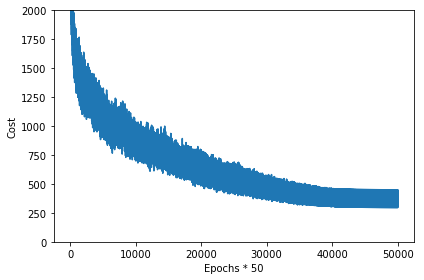

In [14]:
plt.plot(range(len(nn.cost_)), nn.cost_)
plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs * 50')
plt.tight_layout()
plt.show()

좀더 smooth한 버전으로 그리면(mini batch interval averaged) 약 800번째 epoch에서 converge 하는 것을 볼수 있다.

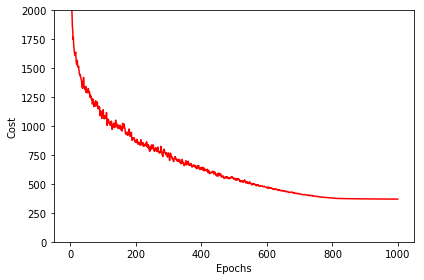

In [15]:
batches = np.array_split(range(len(nn.cost_)), 1000)
cost_ary = np.array(nn.cost_)
cost_avgs = [np.mean(cost_ary[i]) for i in batches]
plt.plot(range(len(cost_avgs)),cost_avgs,color='red')

plt.ylim([0, 2000])
plt.ylabel('Cost')
plt.xlabel('Epochs')
plt.tight_layout()
plt.show()

Accuracy 측정

In [16]:
y_train_pred = nn.predict(X_train)
acc = np.sum(y_train == y_train_pred, axis=0) / X_train.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 97.51%


In [19]:
y_test_pred = nn.predict(X_test)
acc = np.sum(y_test == y_test_pred, axis=0) / X_test.shape[0]
print('Training accuracy: %.2f%%' % (acc * 100))

Training accuracy: 95.55%


training data에 약간 overfit 되었다고 해석할 수 있다. 이를 나아지게 하려면, hidden unit의 갯수를 바꾸던가, regularization parameter, learning rate, values of decrease constant 등의 hyperparameter들을 바꾸어 줘야 한다. 잘 분류를 못하고 있는 데이터를 관찰해보면,

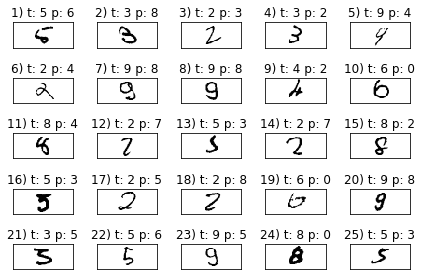

In [20]:
miscl_img = X_test[y_test != y_test_pred][:25]
correct_lab = y_test[y_test != y_test_pred][:25]
miscl_lab= y_test_pred[y_test != y_test_pred][:25]
fig, ax = plt.subplots(nrows=5,
                        ncols=5,
                        sharex=True,
                        sharey=True,)                       
ax = ax.flatten()

for i in range(25):
    img = miscl_img[i].reshape(28, 28)
    ax[i].imshow(img, cmap='Greys', interpolation='nearest')
    ax[i].set_title('%d) t: %d p: %d'
                    % (i+1, correct_lab[i], miscl_lab[i]))

ax[0].set_xticks([])
ax[0].set_yticks([])
plt.tight_layout()
plt.show()